In [1]:
import laspy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

basePath = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/"

In [3]:
lasDF = laspy.read(basePath + "Results/HECAPO/Parcels/5193403DF0859S/16/Map files/16.laz")
lasDF.xyz

array([[4.05218158e+05, 4.58925625e+06, 6.65480000e+01],
       [4.05218597e+05, 4.58925535e+06, 7.50850000e+01],
       [4.05218585e+05, 4.58925526e+06, 7.61310000e+01],
       ...,
       [4.05230972e+05, 4.58921907e+06, 7.78570000e+01],
       [4.05227247e+05, 4.58921656e+06, 7.76450000e+01],
       [4.05225983e+05, 4.58921572e+06, 7.75490000e+01]], shape=(11193, 3))

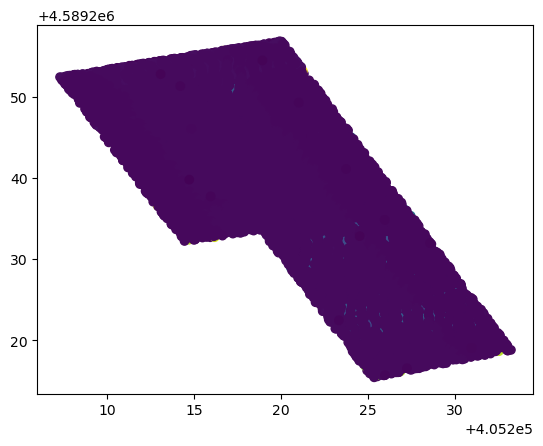

In [4]:
plt.scatter(lasDF.x, lasDF.y, c=lasDF.z)

(array([1.0679e+04, 0.0000e+00, 7.3000e+01, 9.6000e+01, 7.6000e+01,
        0.0000e+00, 0.0000e+00, 6.0000e+00, 9.5000e+01, 1.6800e+02]),
 array([ 63.568 , 154.9851, 246.4022, 337.8193, 429.2364, 520.6535,
        612.0706, 703.4877, 794.9048, 886.3219, 977.739 ]),
 <BarContainer object of 10 artists>)

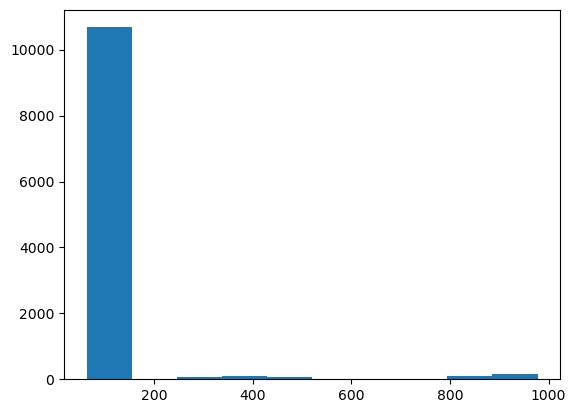

In [5]:
plt.hist(lasDF.z)

In [9]:
lasDF_copy = lasDF.xyz

In [62]:
def smooth_filter(center_point, xyz, dist=1):
    x, y, z = center_point[0], center_point[1], center_point[2]
    x_min, x_max = x - dist/2, x + dist/2
    y_min, y_max = y - dist/2, y + dist/2

    mask = (
        (xyz[:, 0] >= x_min) & (xyz[:, 0] <= x_max) &
        (xyz[:, 1] >= y_min) & (xyz[:, 1] <= y_max)
    )
    
    points_in_square = xyz[mask]
   
    z_values = points_in_square[:, 2]

    upper_threshold = np.percentile(z_values, 75)
    lower_threshold = np.percentile(z_values, 25)


    # upper_threshold = np.mean(z_values[z_values <= mean_z + 3*std_z])

    if ((z <= upper_threshold) and (z >= lower_threshold)):
        return z
    else:
        filtered_z = z_values[(z_values <= upper_threshold) & (z_values >= lower_threshold)]
        mean_z = np.mean(filtered_z)
        std_z = np.std(filtered_z)

        return np.mean(z_values[(z_values <= mean_z - std_z) & (z_values <= mean_z + std_z)])

smoothed_z = np.array([smooth_filter(point, lasDF_copy) for point in lasDF_copy])


/home/jaumeasensio/anaconda3/envs/qgis_stable/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jaumeasensio/anaconda3/envs/qgis_stable/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


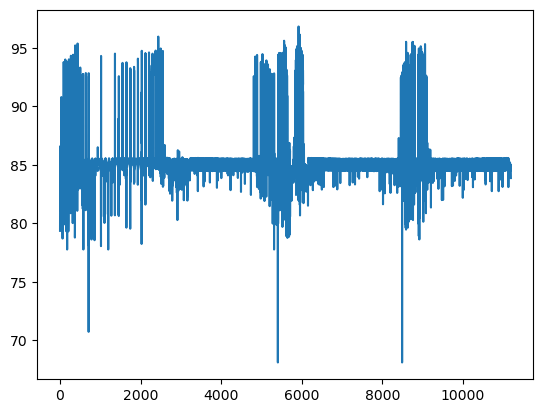

(array([3.00e+00, 0.00e+00, 0.00e+00, 2.60e+01, 1.71e+02, 7.74e+03,
        2.67e+03, 5.40e+01, 3.56e+02, 1.43e+02]),
 array([68.095 , 70.9682, 73.8414, 76.7146, 79.5878, 82.461 , 85.3342,
        88.2074, 91.0806, 93.9538, 96.827 ]),
 <BarContainer object of 10 artists>)

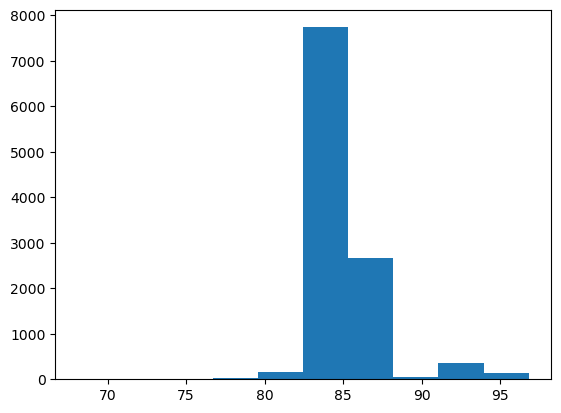

In [63]:
plt.plot(smoothed_z)
plt.show()
plt.hist(smoothed_z)
# plt.plot(lasDF_copy[:,2])

In [50]:
len(lasDF_copy[0,:])

3

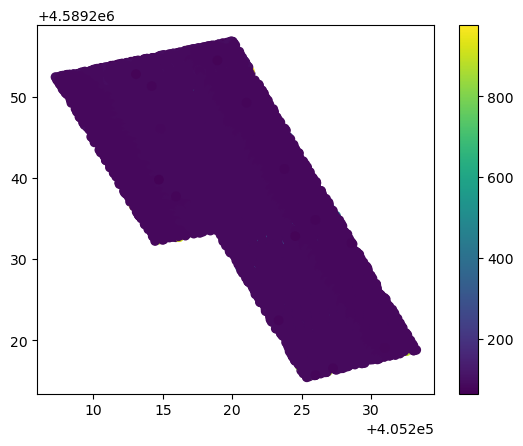

In [51]:
plt.scatter(lasDF_copy[:,0], lasDF_copy[:,1], c=lasDF_copy[:,2])
plt.colorbar()

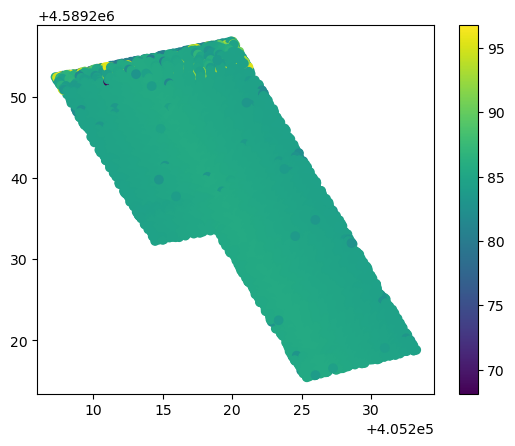

In [64]:
plt.scatter(lasDF_copy[:,0], lasDF_copy[:,1], c=smoothed_z)
plt.colorbar()

In [20]:
f = np.vectorize(smooth_filter)
lasDF_copy[:, 2] = f(array[:, column_index])

array([4.05219849e+05, 4.58925124e+06, 8.47920000e+01])

(array([21.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 65.144 , 155.3845, 245.625 , 335.8655, 426.106 , 516.3465,
        606.587 , 696.8275, 787.068 , 877.3085, 967.549 ]),
 <BarContainer object of 10 artists>)

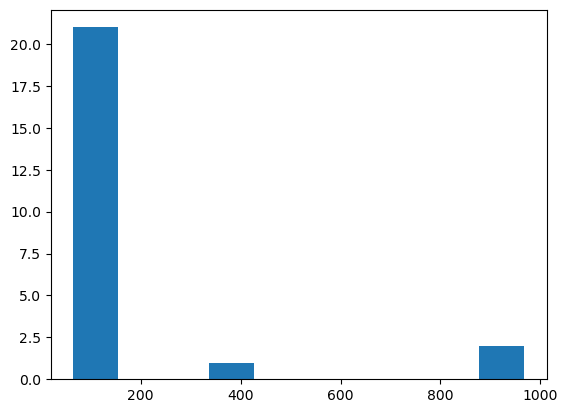

In [16]:
plt.hist(selection[:,2])